'''В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).
Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
Credit Card Fraud Detection
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.
Импортруйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”.
Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой переменной Class и примените к полученным данным метод plot, чтобы построить столбчатую диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб.
На следующем графике постройте две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). Подберите значение аргумента density так, чтобы по вертикали графика было расположено не число наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а коэффициент alpha сделайте равным 0.5, чтобы гистограммы были полупрозрачными и не загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма обычных транзакций должна быть серого цвета, а мошеннических - красного. Горизонтальной оси дайте название “Class”.'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

creditcarddata = pd.read_csv('creditcard.csv')

In [2]:
creditcarddata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


0    284315
1       492
Name: Class, dtype: int64


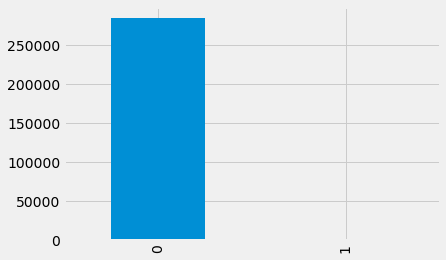

In [3]:
cardclass = pd.value_counts(creditcarddata['Class'])
print(cardclass)
cardclass.plot(kind="bar")
plt.show()

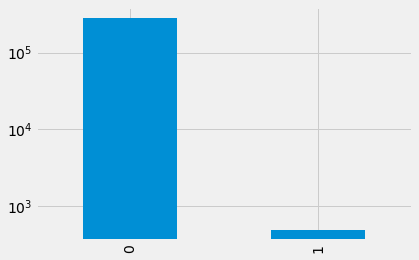

In [4]:
cardclass.plot(kind="bar", logy=True)
plt.show()

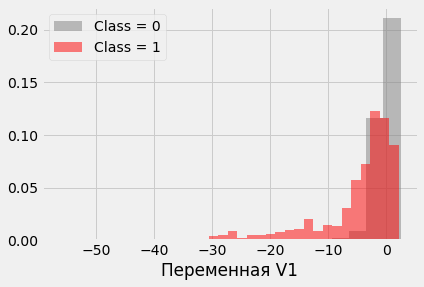

In [12]:
plt.hist(creditcarddata['V1'].loc[creditcarddata['Class'] == 0], bins = 20, density = True, alpha = 0.5, color = 'gray')
plt.hist(creditcarddata['V1'].loc[creditcarddata['Class'] == 1], bins = 20, density = True, alpha = 0.5, color = 'red')
plt.legend(labels=['Class = 0', 'Class = 1'])
plt.xlabel("Переменная V1")
plt.show()